In [28]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import seaborn as sns

In [29]:
#call raw data files
city_path= "raw_data/city_data.csv"
ride_path = "raw_data/ride_data.csv"

#read raw data files into dataframes
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

#sorted_city_data = city_data.sort("city", inplace = True)

city_data_df = pd.DataFrame(city_data)
ride_data_df = pd.DataFrame(ride_data)

#Attempted to ort these by city name... hasn't been working
#city_data_df = city_data_df.sort_values("city", inplace = True)
#ride_data_df = ride_data_df.sort_values("city", inplace = True)
print(len(ride_data_df))
#preview the data frame
city_data_df.head()

2375


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [30]:
#preview the data frame
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [31]:
all_data = pd.merge(ride_data, city_data, how="left", on="city")

#compare the length of all_data and ride_data... it looks like there are 32 cities with no ride data, so they have blank rows
#(due to the outer join)
print(len(all_data))
print(len(ride_data))
all_data.head()
#list(all_data)

2407
2375


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [52]:
#create three separate data sets by type
urban_data = all_data[all_data["type"] == "Urban"]

suburban_data = all_data[all_data["type"] == "Suburban"]

rural_data = all_data[all_data["type"] == "Rural"]

In [32]:
#calculate the average fare by city
average_fare = pd.DataFrame(all_data.groupby(["city"]).mean()["fare"])
#print(len(average_fare))
average_fare.head()

,fare
city,
Alvarezhaven,23.928710
Alyssaberg,20.609615
Anitamouth,37.315556
Antoniomouth,23.625000
Aprilchester,21.981579


In [33]:
#determine the number of rides by city
ride_numbers = pd.DataFrame(all_data.groupby(["city"]).count()["fare"])
print(len(ride_numbers))
ride_numbers.head()

125


,fare
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [34]:
driver_count = pd.DataFrame(all_data.groupby(["city"]).mean()["driver_count"])

print(len(driver_count))
driver_count.head()
#type(driver_count)

125


,driver_count
city,
Alvarezhaven,21.0
Alyssaberg,67.0
Anitamouth,16.0
Antoniomouth,21.0
Aprilchester,49.0


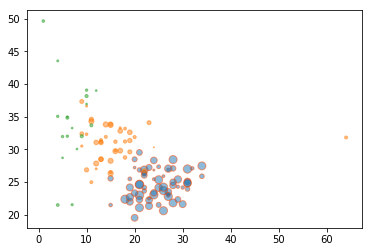

In [61]:
#NEED TO DO THIS THREE TIMES - one for each city type, then plt.show just once

#plot urban data
plt.scatter(urban_data.groupby(["city"]).count()["fare"], urban_data.groupby(["city"]).mean()["fare"], s = urban_data.groupby(["city"]).mean()["driver_count"], alpha = .5, edgecolor = "orangered")

#plot suburban data
plt.scatter(suburban_data.groupby(["city"]).count()["fare"], suburban_data.groupby(["city"]).mean()["fare"], s = suburban_data.groupby(["city"]).mean()["driver_count"], alpha = .5)

#plot rural data
plt.scatter(rural_data.groupby(["city"]).count()["fare"], rural_data.groupby(["city"]).mean()["fare"], s = rural_data.groupby(["city"]).mean()["driver_count"], alpha = .5)

plt.show()
#average_fare.head()

In [15]:
#what is going on here? I can't get city_data sorted, and can't pull the specific columns that I want
grouped_data = all_data.groupby(["city","type"])
#type(grouped_data)
grouped_data.mean()
#grouped_data_df = pd.DataFrame(grouped_data.mean())

#BELOW IS MY VARIABLE FOR AVERAGE FARE and DRIVER COUNT
#pd.DataFrame(grouped_data["fare"].mean())
#grouped_data["driver_count"].mean()


,,fare,ride_id,driver_count
city,type,,,
Alvarezhaven,Urban,23.928710,5.351586e+12,21.0
Alyssaberg,Urban,20.609615,3.536678e+12,67.0
Anitamouth,Suburban,37.315556,4.195870e+12,16.0
Antoniomouth,Urban,23.625000,5.086800e+12,21.0
Aprilchester,Urban,21.981579,4.574788e+12,49.0
Arnoldview,Urban,25.106452,5.021952e+12,41.0
Campbellport,Suburban,33.711333,5.805424e+12,26.0
Carrollbury,Suburban,36.606000,4.274615e+12,4.0
Carrollfort,Urban,25.395517,4.759008e+12,55.0


In [16]:
#

In [11]:
list(all_data)

['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']